# Solve elliptic pde on graph with fem


Change working directory (remember to replace "path-to-your-directory" with your own directory)

In [ ]:
%cd /"path-to-your-directory"/GP-GNN

Import used source files

In [2]:
import numpy as np
from dolfin import Expression, Constant

from src.graph.graph2D import Graph2D
from src.graph.graphProperties import GraphProperties
from src.pde.ellipticPdeSolver2D import EllipticPdeSolver2D

Force matplotlib to plot inline

In [3]:
%matplotlib inline

## Domain

We consider a star shaped domain as follows:

In [4]:
p = GraphProperties(n_vertexes=5)
v = [[0, 0], [1, 0], [0, 1], [-1, 0], [0, -1]]
e = [[0, 1], [0, 2], [0, 3], [0, 4]]
g = Graph2D(p, vertexes=v, edges=e)

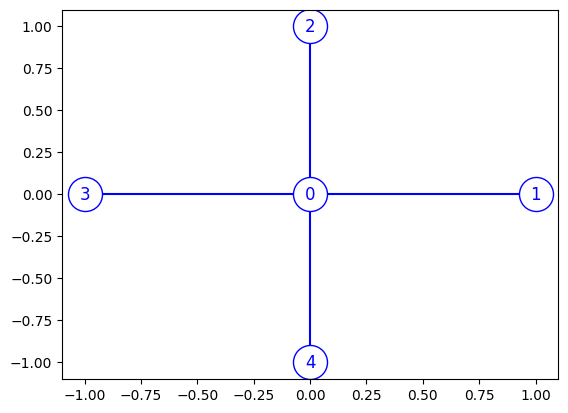

In [5]:
g.plot()

## Test 1 - constant function

We consider the following problem:


$
\begin{cases}
-\Delta u + (x^2+y^2+1) u = 5(x^2+y^2+1) & \quad \text{in } G \\
\sum_{e \in E_v} \frac{\mathrm{d} u}{\mathrm{d} x^e}(v)=0
    & \quad \forall v \in V
\end{cases}
$

That has the exact solution  $u(x,y)=5$

Then, we can solve it using the following code

Infinity norm error is 1.69e-14
The computed solution is the following


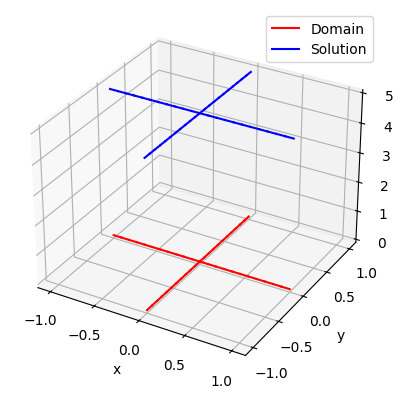

In [6]:
# subclass EllipticPdeSolver2D and override method solve

class Problem1(EllipticPdeSolver2D):
    def __init__(self, graph):
        super().__init__(graph)

    def solve(self, *args, **kwargs):
        # Define f and w
        f = Expression("5 * ( x[0]*x[0] + x[1]*x[1] + 1 )", degree=2)
        w = Expression("x[0]*x[0] + x[1]*x[1] + 1", degree=2)
        # Solve the problem
        super().solve(w, f)

    @staticmethod
    def exact_sol(x):
        return 5

pde1 = Problem1(g)
pde1.solve()
# compute error in infinity norm
print(f"Infinity norm error is {pde1.inf_error(pde1.exact_sol):.2e}")
# plot the solution
print("The computed solution is the following")
pde1.plot_solution()

## Test 2 - linear function

We consider the mixed Dirichlet-Neumann-Kirchhoff problem:


$
\begin{cases}
-\Delta u + (x^2 + y^2 + 1) u = (x+y)(x^2+y^2+1) & \quad \text{in } G \\
\sum_{e \in E_{v_0}} \frac{\mathrm{d} u}{\mathrm{d} x^e}(v_0)=0
\\ u(v_1) = 1
\\ u(v_2) = 1
\\ u(v_3) = -1
\\ u(v_4) = -1
\end{cases}
$

That has the exact solution  $u(x,y)=x+y$

Then, we can solve it using the following code

Infinity norm error is 7.22e-16
The computed solution is the following


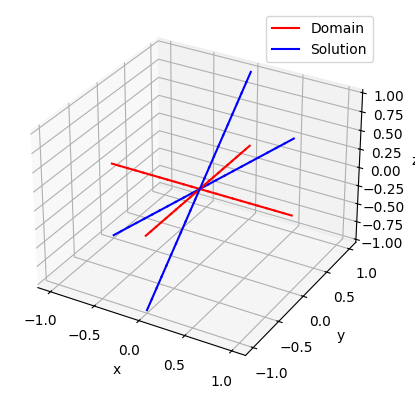

In [7]:
# subclass EllipticPdeSolver2D and override method solve

class Problem2(EllipticPdeSolver2D):
    def __init__(self, graph):
        super().__init__(graph)

    def solve(self, *args, **kwargs):
        # Define Dirichlet boundary conditions
        u0 = Expression("x[0]+x[1]", degree=2)

        def u0_boundary(x):
            tol = 1E-15
            for vertex in self.boundaryVertexes:
                if max(abs(vertex - x)) < tol:
                    return True
            return False

        # Define f and w
        f = Expression("(x[0]+x[1]) * ( x[0]*x[0] + x[1]*x[1] + 1 )", degree=2)
        w = Expression("x[0]*x[0] + x[1]*x[1] + 1", degree=2)
        # Solve the problem
        super().solve(w, f, u0, u0_boundary)

    @staticmethod
    def exact_sol(x):
        return x[0] + x[1]

pde2 = Problem2(g)
pde2.solve()
# compute error in infinity norm
print(f"Infinity norm error is {pde2.inf_error(pde2.exact_sol):.2e}")
# plot the solution
print("The computed solution is the following")
pde2.plot_solution()

## Test 3 - function of a single variable

We consider the fully homogeneous Dirichlet problem:


$
\begin{cases}
-\Delta u + u = (4\pi^2+1) sin(2\pi x) & \quad \text {in } G
\\ \sum_{e \in E_{v_0}} \frac{\mathrm{d} u}{\mathrm{d} x^e}(v_0)=0
\\ u(v) = 0 & \quad \forall v \neq v_0
\end{cases}
$

That has the exact solution  $u(x,y)=sin(2\pi x)$

Then, we can solve it using the following code

Infinity norm error is 3.10e-05
The computed solution is the following


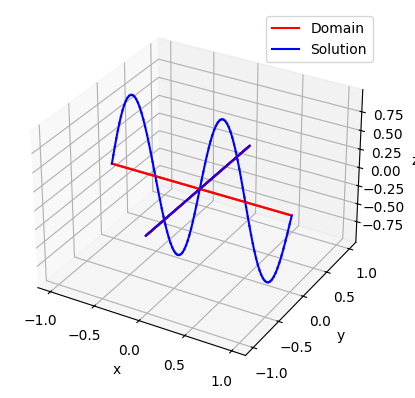

In [8]:
# subclass EllipticPdeSolver2D and override method solve

class Problem3(EllipticPdeSolver2D):
    def __init__(self, graph):
        super().__init__(graph, internal_nodes=50)

    def solve(self, *args, **kwargs):
        # Define Dirichlet boundary conditions
        u0 = Constant(0)

        def u0_boundary(x):
            tol = 1E-15
            for vertex in self.boundaryVertexes:
                if max(abs(vertex - x)) < tol:
                    return True
            return False

        # Define f and w
        f = Expression("(4*pi*pi+1)*sin(2*pi*x[0])", degree=2)
        w = Constant(1)
        # Solve the problem
        super().solve(w, f, u0, u0_boundary)

    @staticmethod
    def exact_sol(x):
        return np.sin(2 * np.pi * x[0])

pde3 = Problem3(g)
pde3.solve()
# compute error in infinity norm
print(f"Infinity norm error is {pde3.inf_error(pde3.exact_sol):.2e}")
# plot the solution
print("The computed solution is the following")
pde3.plot_solution()